**решающее дерево**

Евгений Борисов <esborisov@sevsu.ru>

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

In [2]:
X_train,y_train = make_moons(n_samples=500,noise=.09)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=.5)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((250, 2), (250,), (250, 2), (250,))

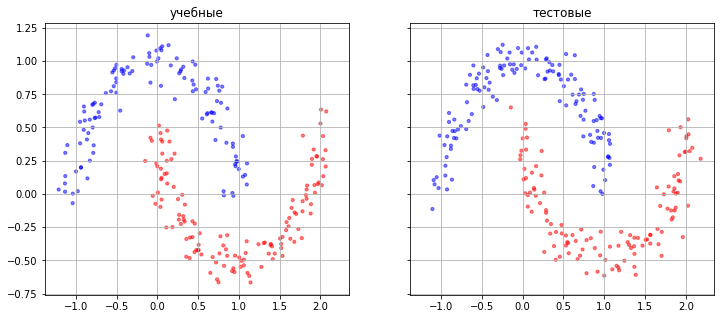

In [3]:
def plot_data(X,y,ax,t): 
    ax.scatter(x=X[:,0],y=X[:,1],c=np.array(['b','r'])[y],s=10,alpha=.5)
    ax.grid()
    ax.set_title(t)

fig,(ax0,ax1) = plt.subplots(1,2, sharey=True, sharex=True, figsize=(12,5),)
plot_data(X_train,y_train,ax0,'учебные')
plot_data(X_test,y_test,ax1,'тестовые')
plt.show()

In [4]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

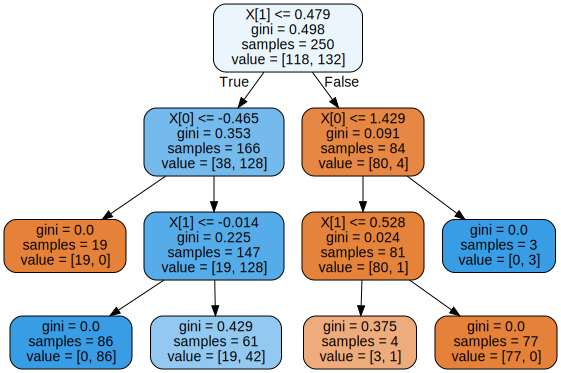

In [13]:
import graphviz
from sklearn.tree import export_graphviz

graphviz.Source( export_graphviz(model, out_file=None,  filled=True, rounded=True) )

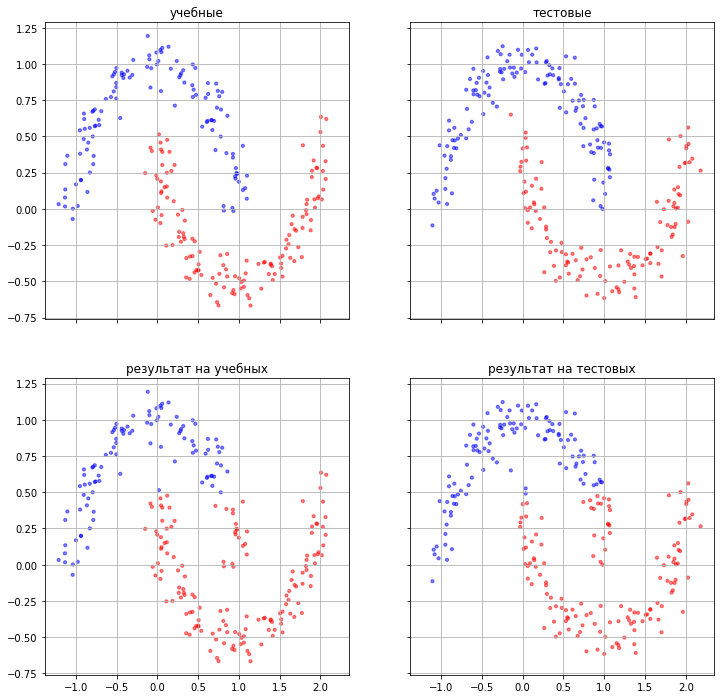

In [14]:
fig,( (ax0,ax1),(ax2,ax3) ) = plt.subplots(2,2, sharey=True, sharex=True, figsize=(12,12),)
plot_data(X_train,y_train,ax0,'учебные')
plot_data(X_test,y_test,ax1,'тестовые')

o_train = model.predict(X_train)
o_test = model.predict(X_test)

plot_data(X_train,o_train,ax2,'результат на учебных')
plot_data(X_test,o_test,ax3,'результат на тестовых')

plt.show()

In [15]:
from sklearn.metrics import classification_report

# метрики результата на тестовом наборе
print( classification_report(y_test,o_test) )

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       132
           1       0.85      0.97      0.91       118

    accuracy                           0.90       250
   macro avg       0.91      0.91      0.90       250
weighted avg       0.91      0.90      0.90       250



In [16]:
# метрики результата на учёбном наборе
print( classification_report(y_train,o_train) )

              precision    recall  f1-score   support

           0       0.99      0.84      0.91       118
           1       0.87      0.99      0.93       132

    accuracy                           0.92       250
   macro avg       0.93      0.92      0.92       250
weighted avg       0.93      0.92      0.92       250



----

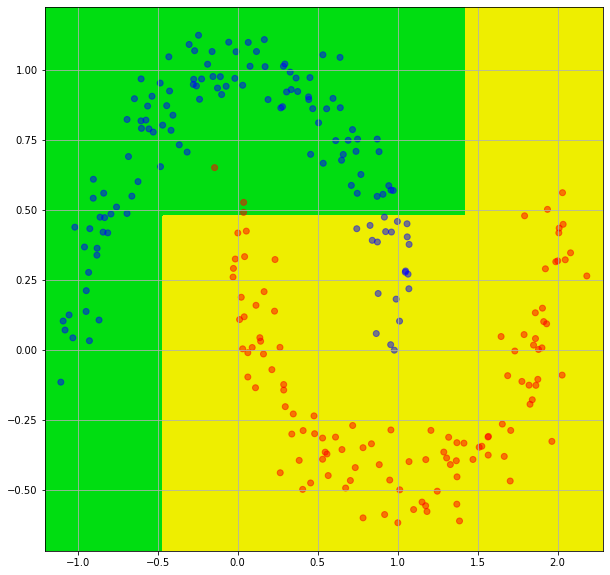

In [20]:
# строим сетку и определяем значения скора классификатора во всех узлах

n=500 # количество разбиений сетки
xx,yy = np.meshgrid( # узлы сетки
    np.linspace( X_test[:,0].min()-0.1, X_test[:,0].max()+0.1, n), 
    np.linspace( X_test[:,1].min()-0.1, X_test[:,1].max()+0.1, n)
) 
xy = np.vstack([xx.ravel(),yy.ravel() ]).T # разворачиваем сетку 

rr = model.predict(xy).reshape(n,n) # применяем классификатор для каждого узла сетки
    
from matplotlib.colors import ListedColormap
cm=ListedColormap(['#00dd11','#eeee00'])
plt.figure(figsize=(10,10))
plt.contourf(xx, yy, rr, cmap=cm)
c = [ ['b','r'][ j ] for j in y_test  ]
plt.scatter( x=X_test[:,0], y=X_test[:,1], c=c, alpha=.5 )
plt.grid()
plt.show()